In [29]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import json
import seaborn as sb
import matplotlib.pyplot as plt

In [30]:
video_data = "../datasets/final/cleaned_youtube_trending_with_api.csv"
youtube_video_data = pd.read_csv(video_data, quotechar='"', escapechar='\\')

In [31]:
youtube_video_data.shape

(72797, 17)

In [32]:
youtube_video_data[youtube_video_data['Top channel'] == True].shape

(9431, 17)

In [33]:
# sb.boxplot(data = pd.DataFrame(youtube_video_data['likes']), orient = "h")

(64743, 1)


<Axes: >

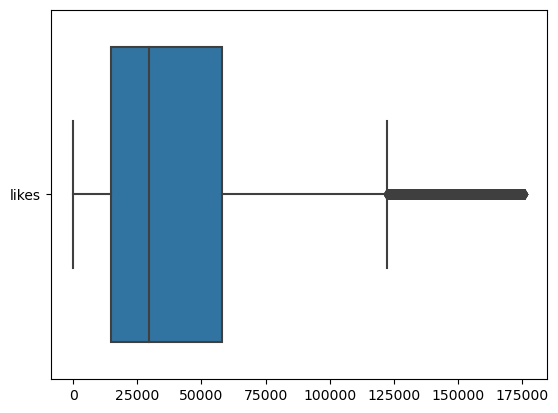

In [34]:
# basic EDA
# sb.boxplot(data = pd.DataFrame(youtube_video_data['likes']), orient = "h")

def removeoutlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    clean = series[~outliers]
    return clean


# for likes
likes = youtube_video_data['likes']
likes = pd.DataFrame(removeoutlier(likes))
print(likes.shape)
sb.boxplot(data = likes, orient = "h")

In [35]:
# for views
# sb.boxplot(data = pd.DataFrame(youtube_video_data['view_count']), orient = "h")


<Axes: >

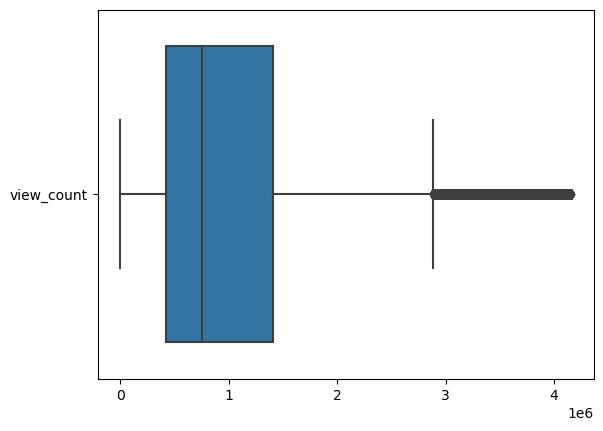

In [36]:
views = youtube_video_data['view_count']
views = pd.DataFrame(removeoutlier(views))
sb.boxplot(data = views, orient = "h")

<Axes: >

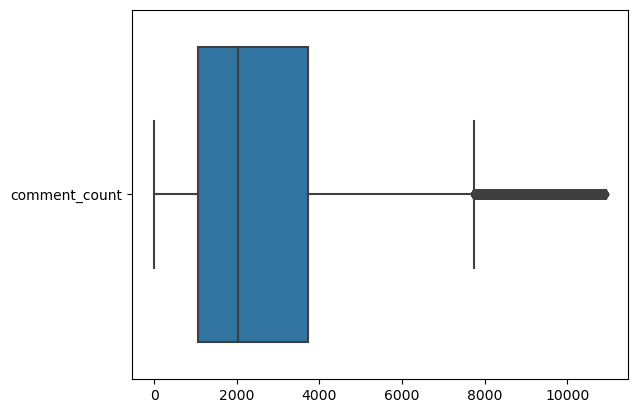

In [37]:
# comments
comments = youtube_video_data['comment_count']
comments = pd.DataFrame(removeoutlier(comments))
sb.boxplot(data = comments, orient = "h")

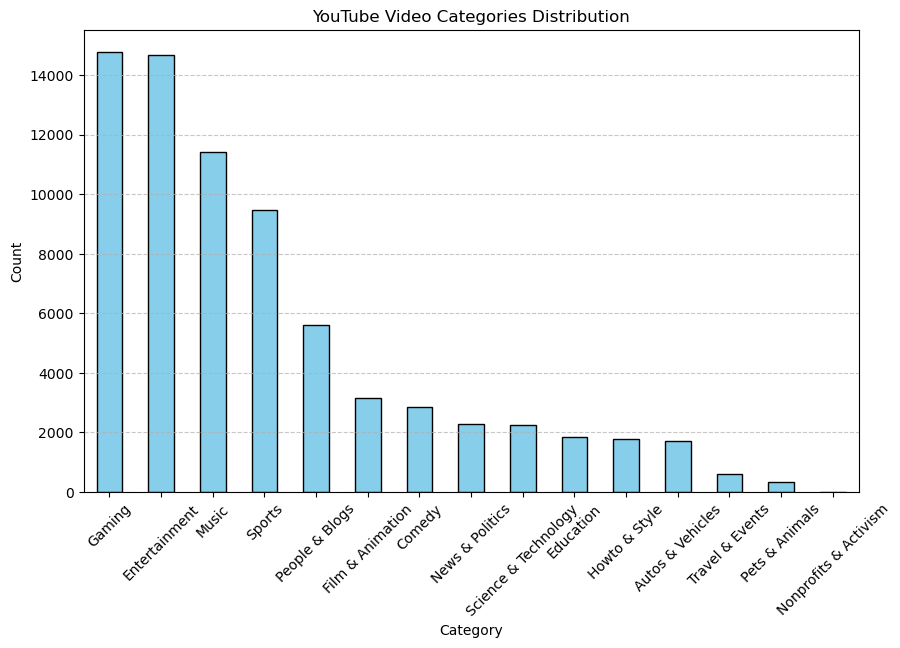

In [38]:
# category "rank"
category_counts = youtube_video_data['category'].value_counts()

# Plot the bar chart
category_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("YouTube Video Categories Distribution")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<Axes: >

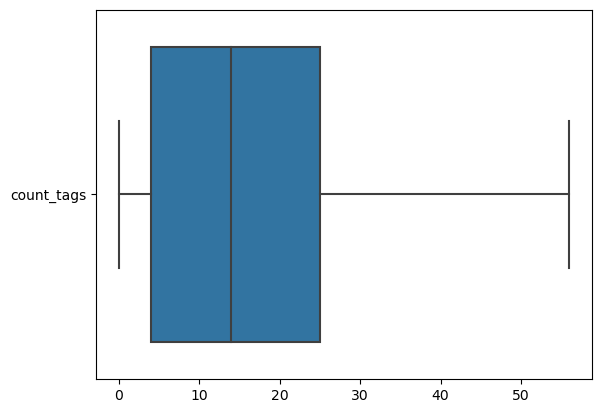

In [39]:
# count tags
tags = youtube_video_data['count_tags']
tags = pd.DataFrame(removeoutlier(tags))
sb.boxplot(data = tags, orient = "h")